# Assignment 1

## Exploring data in Python

For this assignment I have provided a portion of the data from the [Ingenium Canada Museum Collection](https://ingeniumcanada.org/centre/the-ingenium-research-institute) dataset. I've cleaned it up abit!

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

Complete your answers in this Jupyter Notebook, highlighting which cell answers each question.

I have provided some code to load in and format the dataset, run this once at the beginning!

In [2]:
##Setup code to load in the dataset 
import numpy as np
file = open('data/museum_data_assignment-1.tsv')
dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
headings = dataset[0]
dataset = dataset[1:]
dataset = np.array([x for x in dataset if not x[2] == "Unknown"])
dataset[:,2] = [int(x) for x in dataset[:,2]]
dataset[:,6] = [float(x[:-2]) for x in dataset[:,6]]
dataset[:,7] = [float(x[:-2]) for x in dataset[:,7]]
dataset[:,8] = [float(x[:-2]) for x in dataset[:,8]]
dataset[:,5] = [x.replace(";","->").split("->")[0] for x in dataset[:,5]]
print("Column names\n")
print(headings)
print("\nDataset Shape\n")
print(dataset.shape)

Column names

['artifactNumber' 'ObjectName' 'BeginDate' 'group1' 'category1' 'material'
 'Length' 'Width' 'Height' 'image']

Dataset Shape

(6738, 10)


### Question 1

Using either ``sorted()`` or [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html?highlight=max#numpy.argmax), find and display the images for 

    - Oldest
    
    - Newest 
        
**You will have to do some extra research to find out how to display images in a Jupyter notebook**

In [3]:
# The next line of code is used to request data from the internet as per the following website:
# https://www.w3schools.com/python/module_requests.asp

import requests

# The next line of code is required to display images in notebook. I found the solution by using google, which
# took me to the following website: https://ealizadeh.com/blog/3-ways-to-add-images-to-your-jupyter-notebook/

import IPython.display as Disp #<--This needs to be imported to display images in notebook.

In [4]:
# This code slices the column of the dataset which contains the objetcs' dates and puts the data in array old_to_new.
# we learned this during class.

old_to_new = dataset[:,2]

#This code slices the column of the dataset which contains the objetcs' url images and puts the data in array url.

url = dataset[:,9]

# The next code sorts the url array by the order of the column array. It uses a numpy function called argsort.
# I found this solution by typing into google "sort array by value of another array" and went to this website:
# https://www.folkstalk.com/tech/numpy-sort-array-by-another-array-with-code-examples/

order = old_to_new.argsort()
sorted_arr1 = old_to_new[order] 
sorted_arr2 = url[order]         

for i, image in enumerate(sorted_arr1):
    if i == 0:
        url_oldest_image = sorted_arr2[i]
                                         
for i, image in enumerate(sorted_arr1):
    if i == 0:
        url_newest_image = sorted_arr2[len(sorted_arr1) - 1]


This is the image of the oldest objetcs object:


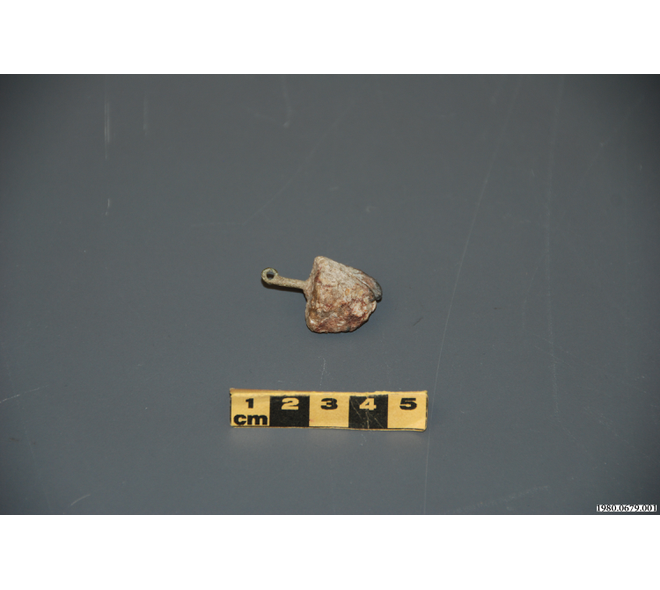

In [5]:
print("This is the image of the oldest objetcs object:")

# This code displays the oldest image. I found the solution for this by using google which tooke mem to the following
# website: https://ealizadeh.com/blog/3-ways-to-add-images-to-your-jupyter-notebook/
# I also used information from other sources but I can't remember which they are at the time of this writing.

Disp.Image(requests.get(url_oldest_image).content)

This is the image of the newest objetcs object:


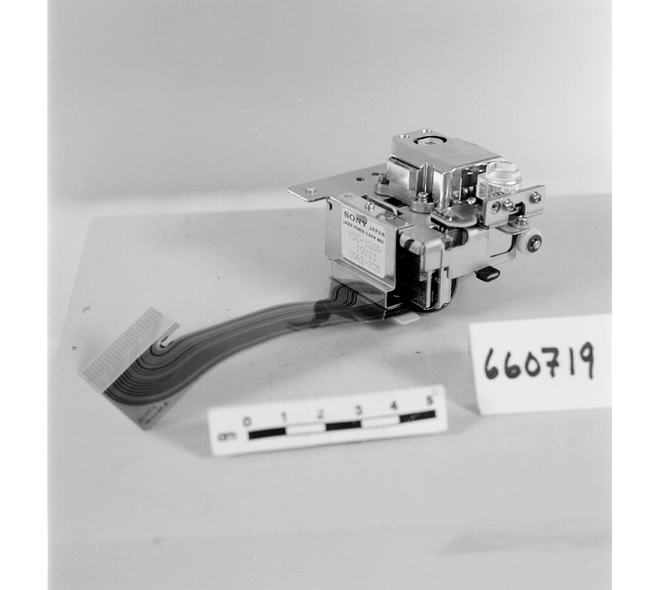

In [6]:
print("This is the image of the newest objetcs object:")

# This code displays the newest image.

Disp.Image(requests.get(url_newest_image).content)

### Question 2

Assuming the volume of an object is ``length x width x height``

1. Create a new 1-D array containing the volumes of each object 


2. Remove the **top and bottom 20%** (e.g. the biggest and smallest objects)


3. Plot a histogram of the remaining object's volumes. Label the axes appropriately.



In [7]:
import matplotlib.pyplot as plt

In [8]:
# The next line of code creates a a 1D array containing the volumes of each objects. Learned during class.

volume_all_objects = dataset[:,6] * dataset[:,7] * dataset[:,8]

# The next line of code sorts the volume_all_objects array by smallest to biggest. Learned during class.

volume_all_objects.sort()

# The next lines of code calculate the top and bottom 20% to remove and removes them. Learned during class.

number_of_items_in_collection = len(volume_all_objects)
number_of_items_to_remove = int((number_of_items_in_collection / 10) * 2)

volume_all_objects = volume_all_objects[number_of_items_to_remove:-number_of_items_to_remove:]

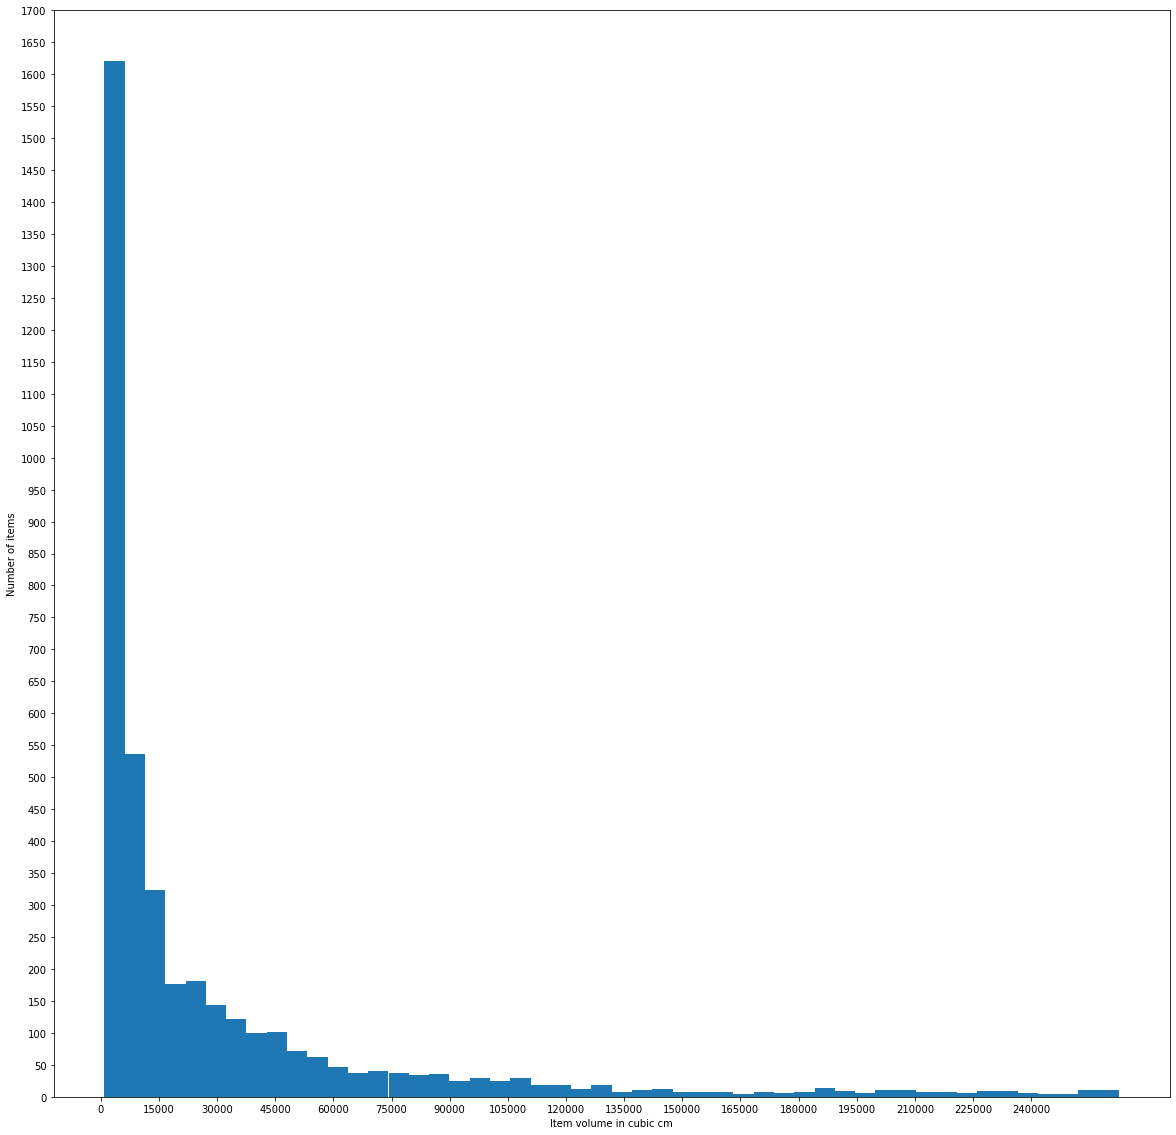

In [9]:
# This cell plots a histogram of the remaining objects' volumes and labels the axes properly. Learned during class.
# Code copied from lecture STEM week 3, also found some code by using google and various websites such as:
# https://stackoverflow.com/questions/53588045/how-to-plot-an-array-in-a-histogram-in-matplotlib
# https://stackoverflow.com/questions/30886364/plotting-a-histogram-from-array
# https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

x = np.arange(0, 250000, 15000)
y = np.arange(0, 1800, 50)
plt.figure(figsize=(20,20))
plt.yticks(y)
plt.xticks(x)
plt.hist(volume_all_objects, 50)
plt.xlabel('Item volume in cubic cm')
plt.ylabel('Number of items')
plt.show()

### Question 3 

What is the most common category and group? What percentage of the total items to they each make up?

**HINT** What kind of ``Average`` is ``most common`` another word for?

In [10]:
# This cell answers question 3. Learned from classes as well as experimenting randomly. 
# It was explaines to me by Ashwathi Pillai, a UAL teaching assistant, that I had misunderstood the question.
# Ashwathi referred me to her notebook which is located at the following URL so as to guide me correctly:
# https://git.arts.ac.uk/20029015/Stem-Assignment/blob/master/Assignment-1.ipynb

from collections import Counter

# The next line of code creates a group array which slice the original dataset according to groups. 
# Learned in class.


# Ashwathi Pillai suggested to makes changes to this part of the code:
group = dataset[:,3]

# The next line of code creates a group array which slice the original dataset according to category.
# Learned in class.

category = dataset[:,4]

# The next line of code counts the number of items in the group array, extract the name of the most common group
# and places the name of the string in the variable group_var.

group_var = Counter(group).most_common(1)[0][0]

# The next line of code counts the number of items in the category array, extract the name
# of the most common category and places the name of the string in the variable category_var.

category_var = Counter(category).most_common(1)[0][0]

# The next line of code counts the number of items in the group array, extract 
# the number of items of the most common group and places the count string in the variable group_count.

group_count = Counter(group).most_common(1)[0][1]

# The next line of code counts the number of items in the group array, extract 
# the number of items of the most common category and places the count string in the variable_category.

category_count = Counter(category).most_common(1)[0][1]

# The next line of code calculates the percentage for the most common group.

percentage_count_for_group = group_count/len(group)*100

# The next line of code calculates the percentage for the most common category.

percentage_count_for_category = category_count/len(category)*100
# End of Ashwathi Pillai's suggestions

# This code makes use of f-strings which is a bit more convenient when using variable with print. 
# This method was suggested by Ashwathi Pillai, a UAL teaching assistant, who referred me to her notebook
# at the following url: https://git.arts.ac.uk/20029015/Stem-Assignment/blob/master/Assignment-1.ipynb. I also copied
# some of Ashwathi's code and modified it slightly.
# The f-string  method is also is well explained on this website:
# https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/

# Ashwathi Pillai suggested to makes changes to this part of the code:
print(f"Most common group: {group_var} with {group_count} items.")
print(f"This constitutes {percentage_count_for_group:.2f} percent of the entire collection.\n")

print(f"Most common category in the {group_var} group: {category_var} with {category_count} items.")
print(f"This constitutes {percentage_count_for_category:.2f} percent of the Technology group.")
# End of Ashwathi Pillai's suggestions

Most common group: Technology with 2914 items.
This constitutes 43.25 percent of the entire collection.

Most common category in the Technology group: Still cameras with 695 items.
This constitutes 10.31 percent of the Technology group.


### Question 4

1. Plot date of objects against width from everything added to the collection between 1850 and 1900. Pick sensible ticks and labels for the axes, as well as a sensible scale.

Each item on the plot should have a different colour or symbol depending on its material as described by the ``material`` heading .**EXTRA BONUS** If you can put in a legend mapping material to colour.

**HINT** Try using `NumPy Filters` and multiple calls to ``ax.plot()`` to plot each group.

2. Write a short paragraph describing what the plot tells us about the museums collection in relation to time, width and material. You can add some extra plots if you think it will help support any of your points. 


In [11]:
# The next line of code creates a dataset_filtered_by_dates array which slice the original dataset according to dates
# going from 1850 to 1900. It uses numpy filters. I took some of this code from Ashwathi Pillai's notebook located 
# at the following URL: https://git.arts.ac.uk/20029015/Stem-Assignment/blob/master/Assignment-1.ipynb
# I also used some code found by using goolgle which took me to the following websites:
# https://www.w3schools.com/python/numpy/numpy_array_filter.asp
# https://www.statology.org/numpy-filter/
# https://datascienceparichay.com/article/filter-numpy-array-with-examples/
# https://www.geeksforgeeks.org/comparing-and-filtering-numpy-array/
# https://stackoverflow.com/questions/73941777/how-to-efficiently-filter-a-large-python-list
# https://stackoverflow.com/questions/52008764/filtering-numpy-array-of-numpy-arrays
# https://linuxhint.com/numpy-filter/


# Ashwathi Pillai suggested this numpy filters:
dataset_filtered_by_dates  = dataset[(dataset[:,2] >= 1850) & (dataset[:,2] <= 1900)]

# The next line of code prints the objects' materials that are in the array.

sorted(np.unique(dataset_filtered_by_dates[:,5]))
# End of Ashwathi Pillai's suggestions

['Unknown',
 'fibre',
 'glass',
 'metal',
 'paper',
 'resin',
 'skin',
 'stone',
 'synthetic',
 'wood']

In [12]:
# The next codes are the filters that slice the array created above according to their materials and puts them
# into an array of their own type.
# Sources are same as above. Please note that this particular cell was copied directly from Ashwathi Pillai's
# notebook which is located at the following URL: 
# https://git.arts.ac.uk/20029015/Stem-Assignment/blob/master/Assignment-1.ipynb

# Ashwathi Pillai suggested these numpy filters:
unknown_arr = dataset_filtered_by_dates[:,5] == 'Unknown'
fibre_arr = dataset_filtered_by_dates[:,5] == 'fibre'
glass_arr = dataset_filtered_by_dates[:,5] == 'glass'
metal_arr = dataset_filtered_by_dates[:,5] == 'metal'
paper_arr = dataset_filtered_by_dates[:,5] == 'paper'
resin_arr = dataset_filtered_by_dates[:,5] == 'resin'
skin_arr = dataset_filtered_by_dates[:,5] == 'skin'
stone_arr = dataset_filtered_by_dates[:,5] == 'stone'
synthetic_arr = dataset_filtered_by_dates[:,5] == 'synthetic'
wood_arr = dataset_filtered_by_dates[:,5] == 'wood'
# End of Ashwathi Pillai's suggestions

In [13]:
# The next lines of code slice the arrays created above by date and width and puts the data in new arrays accordingly.
# Sources are the same as above. Please note that this particular cell was copied directly from Ashwathi Pillai's
# notebook which is located at the following URL: 
# https://git.arts.ac.uk/20029015/Stem-Assignment/blob/master/Assignment-1.ipynb

# Ashwathi Pillai suggested these numpy filters:
unknown_arr_dates = dataset_filtered_by_dates[unknown_arr][:,2]
unknown_arr_width = dataset_filtered_by_dates[unknown_arr][:,7]

fibre_arr_dates = dataset_filtered_by_dates[fibre_arr][:,2]
fibre_arr_width = dataset_filtered_by_dates[fibre_arr][:,7]

glass_arr_dates = dataset_filtered_by_dates[glass_arr][:,2]
glass_arr_width = dataset_filtered_by_dates[glass_arr][:,7]

metal_arr_dates = dataset_filtered_by_dates[metal_arr][:,2]
metal_arr_width = dataset_filtered_by_dates[metal_arr][:,7]

paper_arr_dates = dataset_filtered_by_dates[paper_arr][:,2]
paper_arr_width = dataset_filtered_by_dates[paper_arr][:,7]

resin_arr_dates = dataset_filtered_by_dates[resin_arr][:,2]
resin_arr_width = dataset_filtered_by_dates[resin_arr][:,7]

skin_arr_dates = dataset_filtered_by_dates[skin_arr][:,2]
skin_arr_width = dataset_filtered_by_dates[skin_arr][:,7]

stone_arr_dates = dataset_filtered_by_dates[stone_arr][:,2]
stone_arr_width = dataset_filtered_by_dates[stone_arr][:,7]

synthetic_arr_dates = dataset_filtered_by_dates[synthetic_arr][:,2]
synthetic_arr_width = dataset_filtered_by_dates[synthetic_arr][:,7]

wood_arr_dates = dataset_filtered_by_dates[wood_arr][:,2]
wood_arr_width = dataset_filtered_by_dates[wood_arr][:,7]
# End of Ashwathi Pillai's suggestions

The next cell plots all of the data from the cell above together for date of objects against width. The data is plotted on a "log scale so as to spread it more evenly on the axis of the items' width.

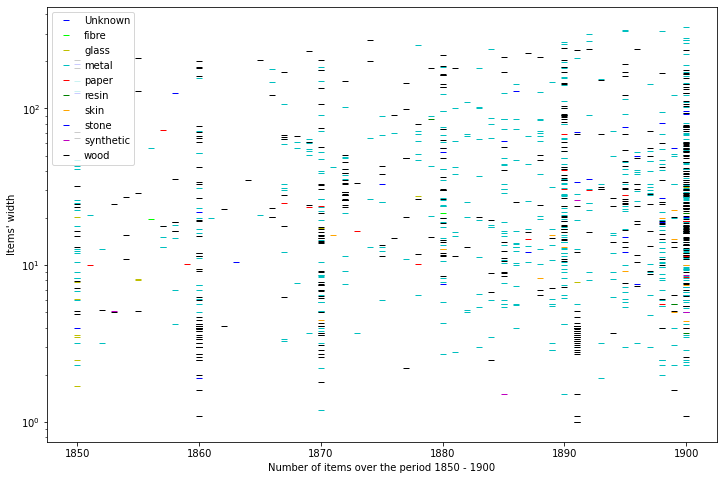

In [14]:
# This plots the data together for objects of all materials.
# Code copied from lecture STEM week 3.
# I also took some of this code from Ashwathi Pillai's notebook located 
# at the following URL: https://git.arts.ac.uk/20029015/Stem-Assignment/blob/master/Assignment-1.ipynb.
# I also found some code by using google and various websites such as:
# https://stackoverflow.com/questions/53588045/how-to-plot-an-array-in-a-histogram-in-matplotlib
# https://stackoverflow.com/questions/30886364/plotting-a-histogram-from-array
# https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# https://matplotlib.org/stable/gallery/color/named_colors.html
# https://matplotlib.org/stable/tutorials/colors/colors.html
# https://www.w3schools.com/python/matplotlib_labels.asp
# https://www.geeksforgeeks.org/how-to-adjust-marker-size-in-matplotlib/
# https://matplotlib.org/stable/api/markers_api.html


# Ashwathi Pillai suggested this method of plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_yscale('log')
ax.set_xlabel('Number of items over the period 1850 - 1900')
ax.set_ylabel('Items\' width')

ax.plot(unknown_arr_dates, unknown_arr_width, "_", color = "b", label = "Unknown")
ax.plot(fibre_arr_dates, fibre_arr_width, "_", color = "lime", label = "fibre")
ax.plot(glass_arr_dates, glass_arr_width, "_", color = "y", label = "glass")
ax.plot(metal_arr_dates, metal_arr_width, "_", color = "c", label = "metal")
ax.plot(paper_arr_dates, paper_arr_width, "_", color = "r", label = "paper")
ax.plot(resin_arr_dates, resin_arr_width, "_", color = "g", label = "resin")
ax.plot(skin_arr_dates, skin_arr_width, "_", color = "orange", label = "skin")
ax.plot(stone_arr_dates, stone_arr_width, "_", color = "b", label = "stone")
ax.plot(synthetic_arr_dates, synthetic_arr_width, "_", color = "m", label = "synthetic")
ax.plot(wood_arr_dates, wood_arr_width, "_", color = "k", label = "wood")
plt.legend(loc='upper left')
plt.show()
# End of Ashwathi Pillai's suggestions

I have also chosen to make separate plots for different materials because there was too much overlap between the markers and it was difficult to differentiate between all the data. This time the data is plotted on a regular scale so as to better discern the width.

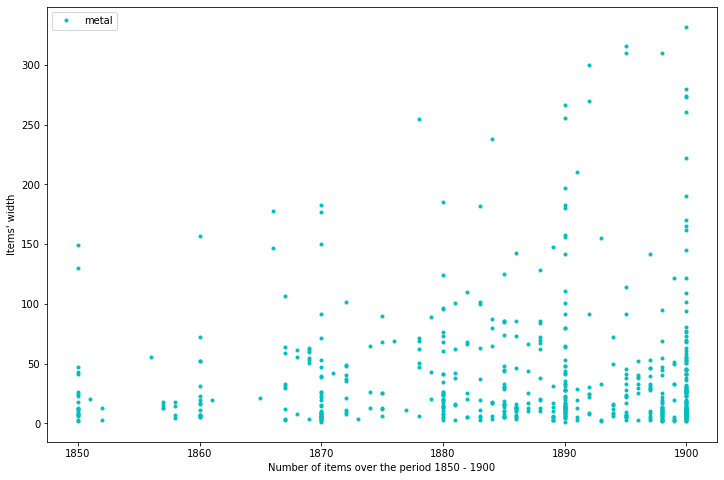

In [19]:
# This plots the data for metal objetcs.
# Sources are same as above.

# Ashwathi Pillai suggested this method of plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Number of items over the period 1850 - 1900')
ax.set_ylabel('Items\' width')
ax.plot(metal_arr_dates, metal_arr_width, ".", color = "c", label = "metal")
plt.legend(loc='upper left')
plt.show()
# End of Ashwathi Pillai's suggestions

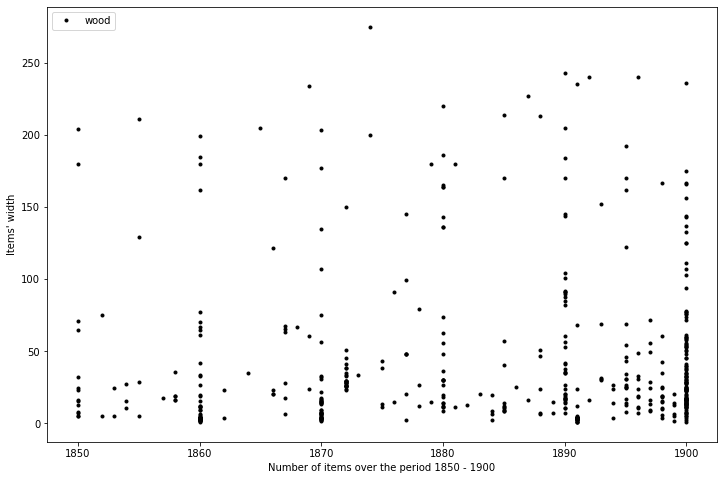

In [16]:
# This plots the data for wood objetcs.
# Sources are same as above.

# Ashwathi Pillai suggested this method of plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Number of items over the period 1850 - 1900')
ax.set_ylabel('Items\' width')
ax.plot(wood_arr_dates, wood_arr_width, ".", color = "k", label = "wood")
plt.legend(loc='upper left')
plt.show()
# End of Ashwathi Pillai's suggestions

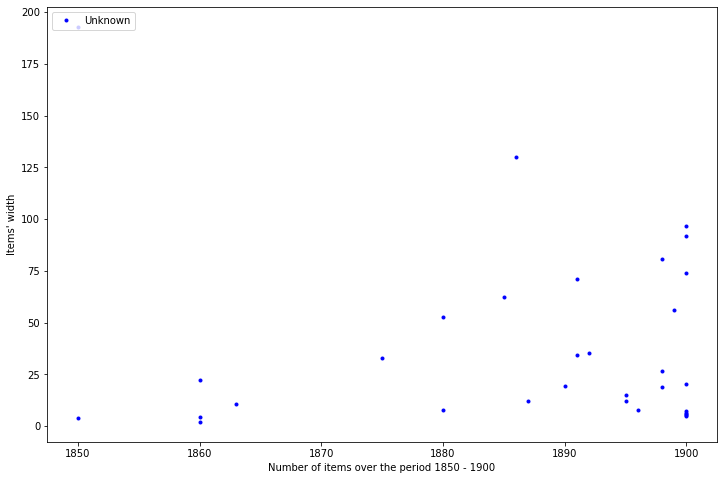

In [17]:
# This plots the data for objetcs of unknown materials.
# Sources are same as above.

# Ashwathi Pillai suggested this method of plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Number of items over the period 1850 - 1900')
ax.set_ylabel('Items\' width')
ax.plot(unknown_arr_dates, unknown_arr_width, ".", color = "b", label = "Unknown")
plt.legend(loc='upper left')
plt.show()
# End of Ashwathi Pillai's suggestions

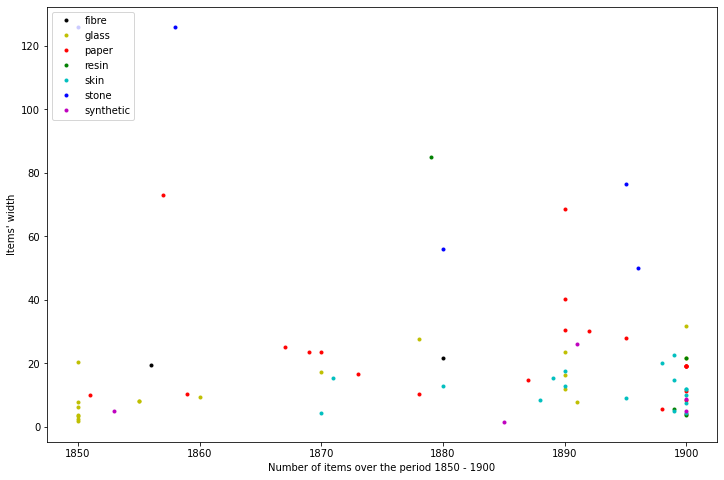

In [18]:
# This plots the data for the remaining objetcs. See legend for specific materials.
# Sources are same as above.

# Ashwathi Pillai suggested this method of plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel('Number of items over the period 1850 - 1900')
ax.set_ylabel('Items\' width')
ax.plot(fibre_arr_dates, fibre_arr_width, ".", color = "k", label = "fibre")
ax.plot(glass_arr_dates, glass_arr_width, ".", color = "y", label = "glass")
ax.plot(paper_arr_dates, paper_arr_width, ".", color = "r", label = "paper")
ax.plot(resin_arr_dates, resin_arr_width, ".", color = "g", label = "resin")
ax.plot(skin_arr_dates, skin_arr_width, ".", color = "c", label = "skin")
ax.plot(stone_arr_dates, stone_arr_width, ".", color = "b", label = "stone")
ax.plot(synthetic_arr_dates, synthetic_arr_width, ".", color = "m", label = "synthetic")
plt.legend(loc='upper left')
plt.show()
# End of Ashwathi Pillai's suggestions

2. Write a short paragraph describing what the plot tells us about the museums collection in relation to time, width and material. You can add some extra plots if you think it will help support any of your points. 


The plots tell us that a lot of items contained in this part of the collection were manufactured at each decades between 1850 and 1900 i.e 1850, 1860, 1870, 1880, 1890 and 1900. For the vast majority those items were made out of metal and wood. Most of them are less than 100cm in width. The wides item is made out of metal, and second widest made out wood. After a brief browse on the museums website, I found out that it has items such as a Titanic model. I found this quite surprising and it might explain the wideness of some items that can be found in the collection. Worthy of note is that the museum owns an actual 12 metres high lighthouse that was acquired by the musuem in 1980 and manufactured in 1855. This is interesting as it does not seem to be reflected in the plots of metal objects, according to the following website, the core of a lighthouse is approximately 487.68 cm in width: https://www.ponceinlet.org/Structural-Specifications-of-Lighthouse-Tower-6-98.html. Therefore, it could mean that the dataset might be outdated.